In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("sleep.csv")

In [3]:
ds.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
ds.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
ds.shape

(374, 13)

In [8]:
ds.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [9]:
ds["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [10]:
ds["Sleep Disorder"].fillna("None",inplace =True)

In [11]:
ds['BMI Category'] = ds['BMI Category'].replace({'Normal Weight': 'Underweight'})
ds['BMI Category'].value_counts()

BMI Category
Normal         195
Overweight     148
Underweight     21
Obese           10
Name: count, dtype: int64

In [12]:
ds.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: xlabel='Occupation', ylabel='count'>

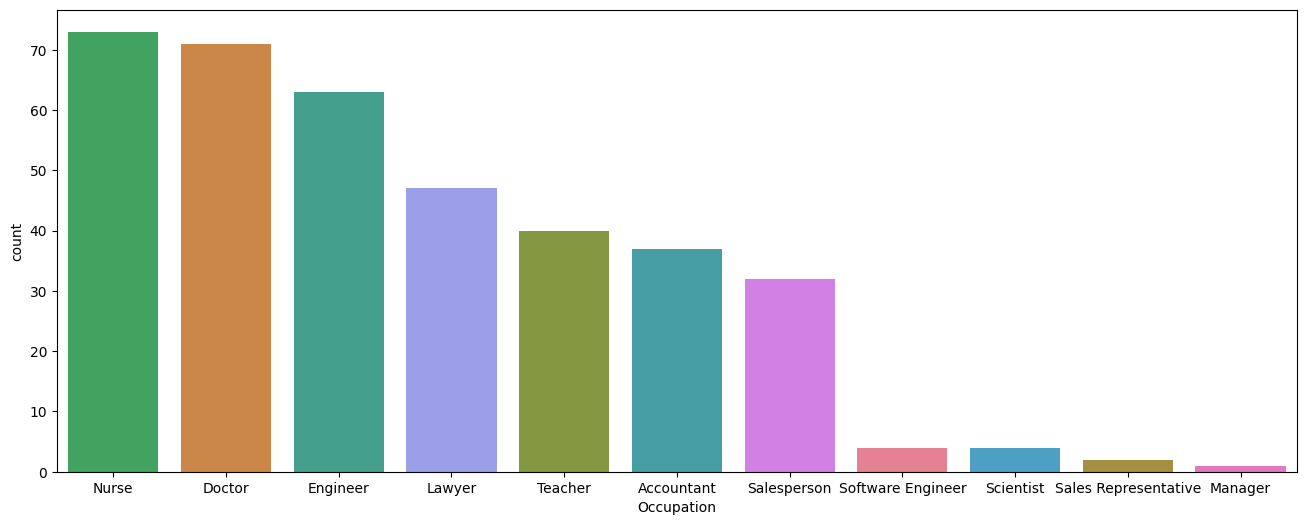

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(data=ds,x="Occupation",order=ds["Occupation"].value_counts().index,hue="Occupation")

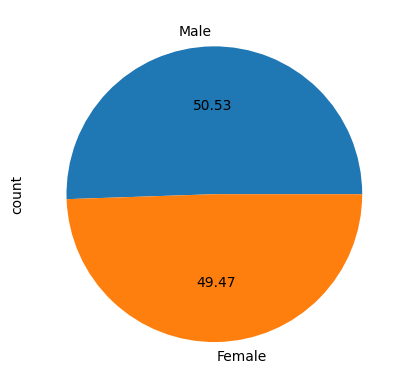

In [14]:
ds["Gender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

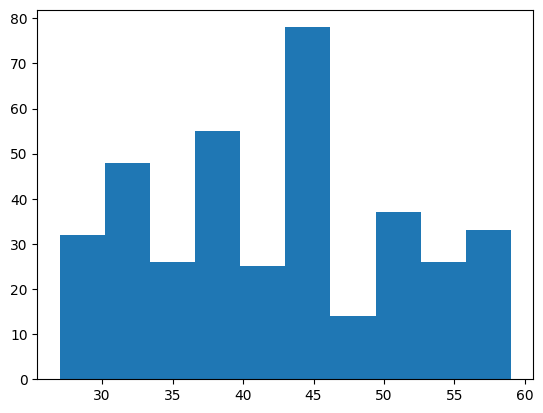

In [15]:
plt.hist(ds["Age"],bins=10)
plt.show()

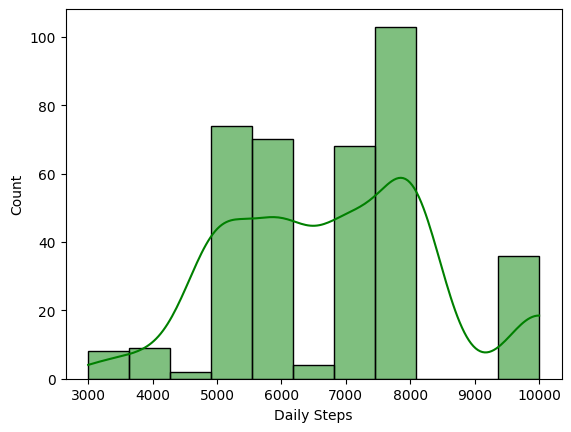

In [16]:
sns.histplot(ds["Daily Steps"],color="green",kde=True)
plt.show()

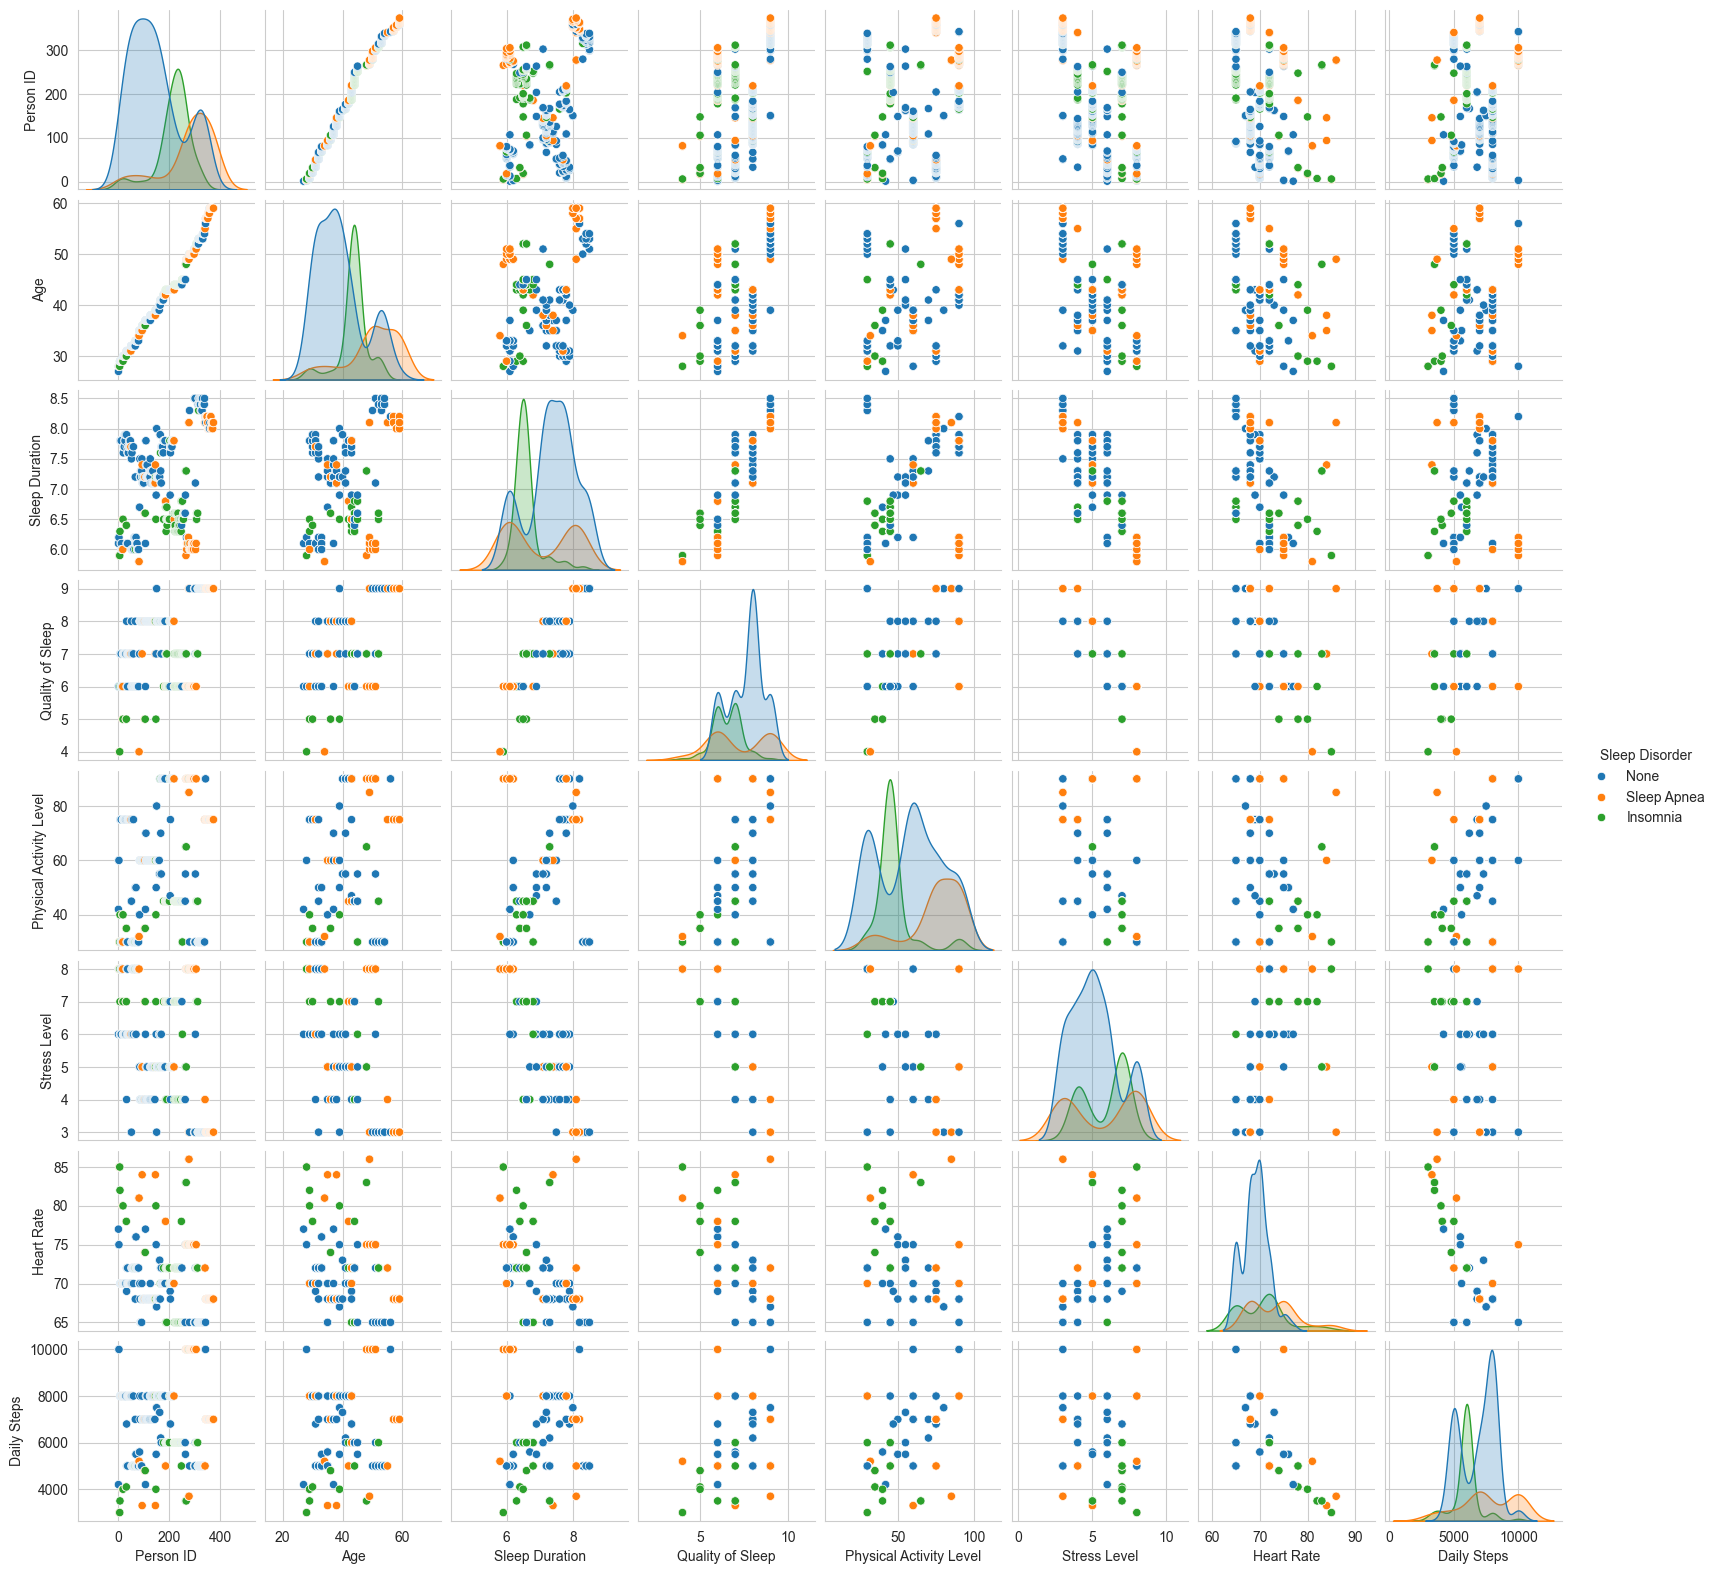

In [17]:
sns.set_style("whitegrid")
sns.pairplot(ds,hue="Sleep Disorder",height=2)
plt.show()

Text(0.5, 1.0, 'Distribution of Sleep Disorders')

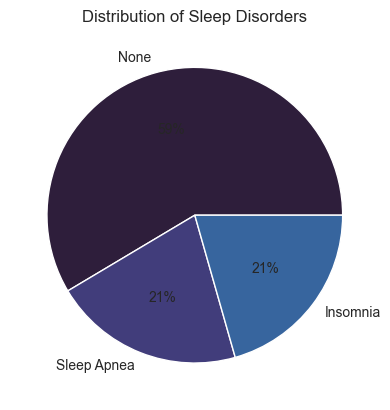

In [18]:
sleep_disorder = ds['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder, labels=sleep_disorder.index, autopct='%.0f%%', colors=sns.color_palette("mako"))
plt.title('Distribution of Sleep Disorders')

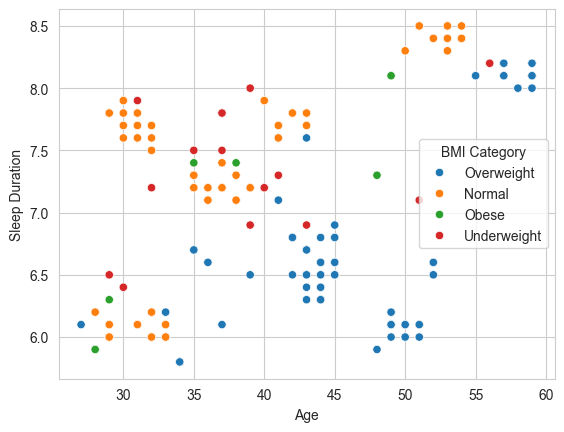

In [19]:
sns.scatterplot(data=ds,x="Age",y="Sleep Duration",hue="BMI Category")
plt.show()

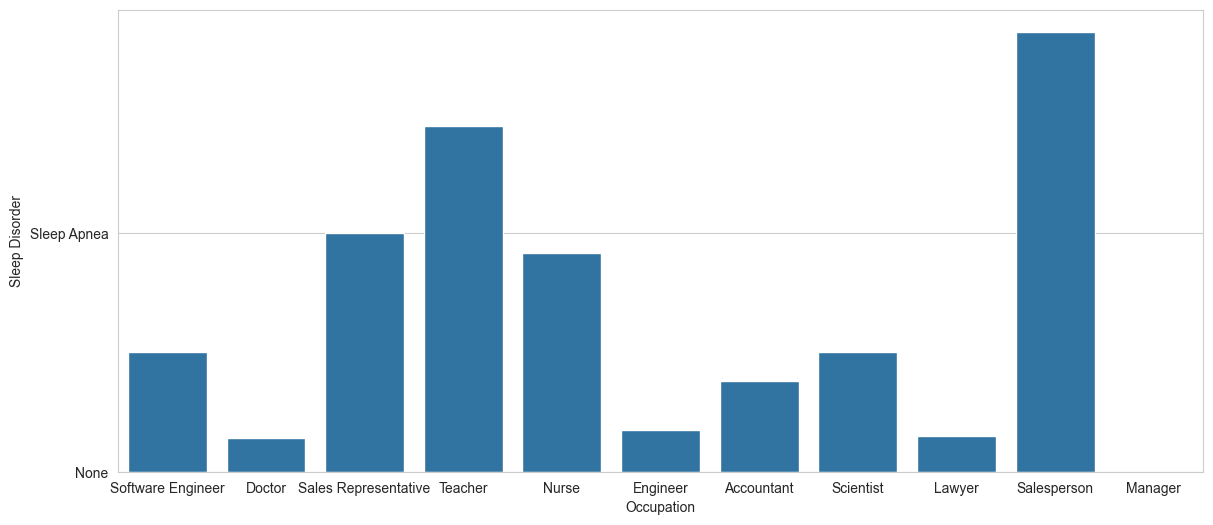

In [20]:
plt.figure(figsize=(14,6))
ax = sns.barplot(ds,x="Occupation",y="Sleep Disorder",ci=None) 
ax.invert_yaxis()
plt.show()

<Axes: xlabel='BMI Category', ylabel='count'>

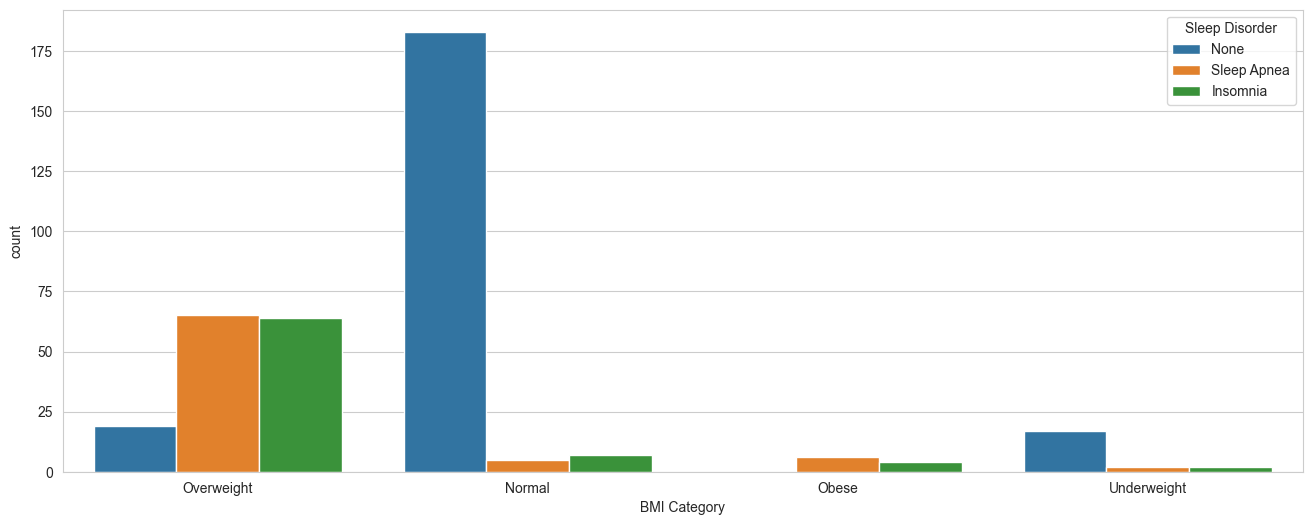

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=ds)

<Axes: xlabel='Gender', ylabel='Sleep Duration'>

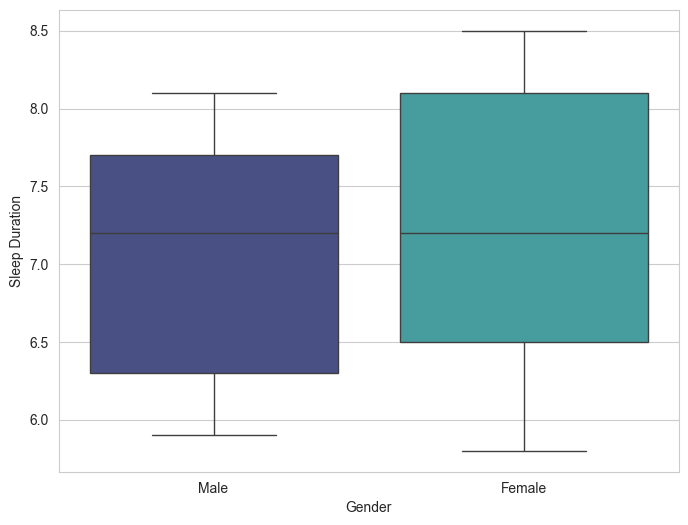

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', palette='mako', data=ds)

In [23]:
df = ds.drop(columns = ["Person ID"], axis= 1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [24]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
gen={'Male':0,'Female':1}
df["Gender"]=df["Gender"].map(gen)

In [26]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [27]:
job= {'Software Engineer':0,'Doctor':1,'Sales Representative':2,'Teacher':3,'Nurse':4,'Engineer':5,'Accountant':6,'Scientist':7,'Lawyer':8,'Salesperson':9,'Manager':10}
df["Occupation"]=df["Occupation"].map(job)

In [28]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Underweight'], dtype=object)

In [29]:
bmi={'Overweight':0,'Normal':1,'Obese':2,'Underweight':3}
df["BMI Category"]=df["BMI Category"].map(bmi)

In [30]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [31]:
sd={'None':0,'Sleep Apnea':1,'Insomnia':2}
df["Sleep Disorder"]=df["Sleep Disorder"].map(sd)

In [32]:
df["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [33]:
df["Quality of Sleep"].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [34]:
df["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [35]:
bp = df['Blood Pressure']
bp.head()

0    126/83
1    125/80
2    125/80
3    140/90
4    140/90
Name: Blood Pressure, dtype: object

In [36]:
low_bp = bp.str.split("/").str.get(1)
high_bp = bp.str.split("/").str.get(0)
high_bp.head()

0    126
1    125
2    125
3    140
4    140
Name: Blood Pressure, dtype: object

In [37]:
df['Systolic BP'] = high_bp.astype(int)
df['Diastolic BP'] = low_bp.astype(int)
df = df.drop(['Blood Pressure'], axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,0,27,0,6.1,6,42,6,0,77,4200,0,126,83
1,0,28,1,6.2,6,60,8,1,75,10000,0,125,80
2,0,28,1,6.2,6,60,8,1,75,10000,0,125,80
3,0,28,2,5.9,4,30,8,2,85,3000,1,140,90
4,0,28,2,5.9,4,30,8,2,85,3000,1,140,90


In [38]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.494652,42.184492,4.614973,7.132086,7.312834,59.171123,5.385027,0.743316,70.165775,6816.844920,0.620321,128.553476,84.649733
std,0.500641,8.673133,2.560033,0.795657,1.196956,20.830804,1.774526,0.763368,4.135676,1617.915679,0.805620,7.748118,6.161611
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,0.000000,35.250000,3.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,125.000000,80.000000
50%,0.000000,43.000000,4.000000,7.200000,7.000000,60.000000,5.000000,1.000000,70.000000,7000.000000,0.000000,130.000000,85.000000
75%,1.000000,50.000000,6.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000,142.000000,95.000000


In [39]:
correlation = df.corr()

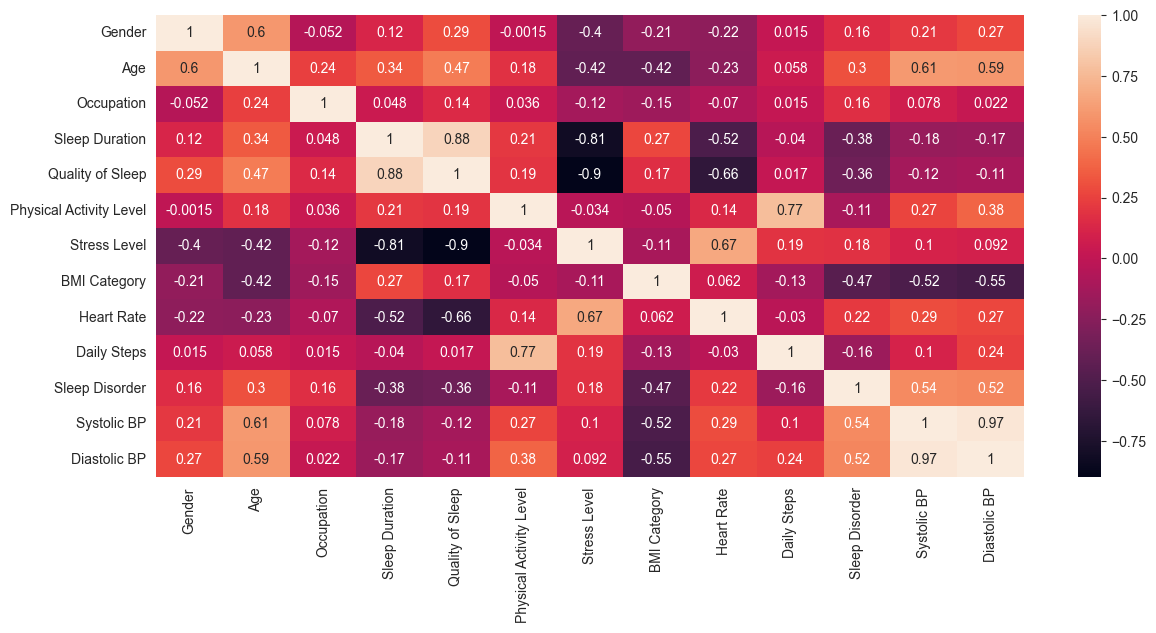

In [40]:
plt.figure(figsize =(14,6))
sns.heatmap(data= correlation, annot = True)
plt.show()

In [41]:
df.groupby(["Sleep Disorder"]).size()

Sleep Disorder
0    219
1     78
2     77
dtype: int64

In [42]:
from sklearn.utils import resample 
sd_0 = df[(df['Sleep Disorder']==0)] 
sd_1 = df[(df['Sleep Disorder']==1)] 
sd_2 = df[(df['Sleep Disorder']==2)]

sd_1_upsampled = resample(sd_1, 
                                 replace=True,    
                                 n_samples= 219, 
                                 random_state=42)  
sd_2_upsampled = resample(sd_2, 
                                 replace=True,   
                                 n_samples= 219, 
                                 random_state=42)  

df = pd.concat([sd_1_upsampled,sd_2_upsampled, sd_0])

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
x = df.drop(['Sleep Disorder'],axis = 1).values
y = df['Sleep Disorder'].values

In [45]:
x

array([[1.0e+00, 5.7e+01, 4.0e+00, ..., 7.0e+03, 1.4e+02, 9.5e+01],
       [1.0e+00, 4.2e+01, 3.0e+00, ..., 5.0e+03, 1.3e+02, 8.5e+01],
       [1.0e+00, 5.9e+01, 4.0e+00, ..., 7.0e+03, 1.4e+02, 9.5e+01],
       ...,
       [1.0e+00, 5.7e+01, 4.0e+00, ..., 7.0e+03, 1.4e+02, 9.5e+01],
       [1.0e+00, 5.9e+01, 4.0e+00, ..., 7.0e+03, 1.4e+02, 9.5e+01],
       [1.0e+00, 5.9e+01, 4.0e+00, ..., 7.0e+03, 1.4e+02, 9.5e+01]])

In [46]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dt = dt.predict(x_test)

In [52]:
print("Accuracy:",accuracy_score(y_test,y_pred_dt))

Accuracy: 0.8939393939393939


In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rf  = rf.predict(x_test)

In [56]:
print("Accuracy:",accuracy_score(y_test,y_pred_rf))

Accuracy: 0.8888888888888888


In [57]:
x1 = [[0,27,0,6.1,6,42,6,0,77,4200,126,83]]

In [58]:
y1 = rf.predict(x1)
y1

array([0], dtype=int64)

In [59]:
import pickle

In [60]:
with open('sleep_prediction_dt.pkl', 'wb') as file:
    pickle.dump(dt, file)